<a href="https://colab.research.google.com/github/shodimaggio/VieWork/blob/develop/vie_sec5_linfilt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線形フィルタ


## 画像ファイルの準備
以下では、画像ファイルを手元からアップロードする方法とURLを指定してアクセスする方法のいずれかを利用してください。
### アップロードする方法

In [0]:
#from google.colab import files
#uploaded_file = files.upload()

In [0]:
#file_name = next(iter(uploaded_file))
#print(file_name)

### URLを指定してアクセスする方法
- 参照サイト：　http://homepages.cae.wisc.edu/~ece533/images/

In [0]:
import urllib.request
import io

url = 'http://homepages.cae.wisc.edu/~ece533/images/lena.png'
file_name = io.BytesIO(urllib.request.urlopen(url).read())

## 画像の読み込み
画像処理ライブラリ Pillow (PIL)を利用

In [25]:
from PIL import Image

img = Image.open(file_name)
print(img.mode)
print(img.format)
print(img.size)
print(img.getbands())

RGB
PNG
(512, 512)
('R', 'G', 'B')


## 画像の表示
可視化ライブラリMatplotlibを利用

(-0.5, 511.5, 511.5, -0.5)

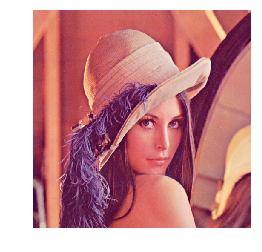

In [26]:
from matplotlib import pyplot as plt

plt.imshow(img)
plt.axis('off')

## グレースケール画像に変換

In [6]:
gray_img = img.convert('L')
from matplotlib import pyplot as plt
print(gray_img.mode)
print(gray_img.format)
print(gray_img.size)
print(gray_img.getbands())

L
None
(512, 512)
('L',)


## グレースケール画像の表示


(-0.5, 511.5, 511.5, -0.5)

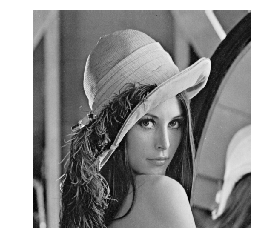

In [27]:
import numpy as np

plt.imshow(gray_img, cmap='gray')
plt.axis('off')

## フィルターカーネル（マスク係数）の準備
PILライブラリのImageFilterを利用

In [0]:
from PIL import ImageFilter

custom_filter = ImageFilter.Kernel((3,3),[ 1, 1, 1, 1, 1, 1, 1, 1, 1 ],scale=1/9)

## フィルタ処理
PILライブラリの Imageオブジェクトの filter メソッドを利用

In [0]:
res_img = gray_img.filter(custom_filter)

## 処理結果の表示

(-0.5, 511.5, 511.5, -0.5)

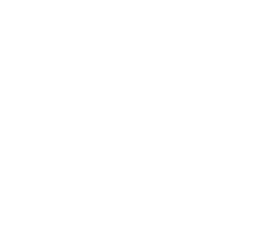

In [32]:
plt.imshow(res_img,cmap='gray')
plt.axis('off')